In [98]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2ycbcr, ycbcr2rgb
from skimage.metrics import mean_squared_error
from skimage.util import img_as_float
from scipy import datasets
from scipy.fft import dctn, idctn

In [99]:
Q_jpeg = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 28, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
], dtype=np.float64)


def plot_images(images, titles, cmap="viridis"):
    fig, axs = plt.subplots(1, len(images), figsize=(10, 10 * len(images)))
    for i, image in enumerate(images):
        axs[i].imshow(image, cmap=cmap)
        axs[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()
    plt.close()

### Task 1
[6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

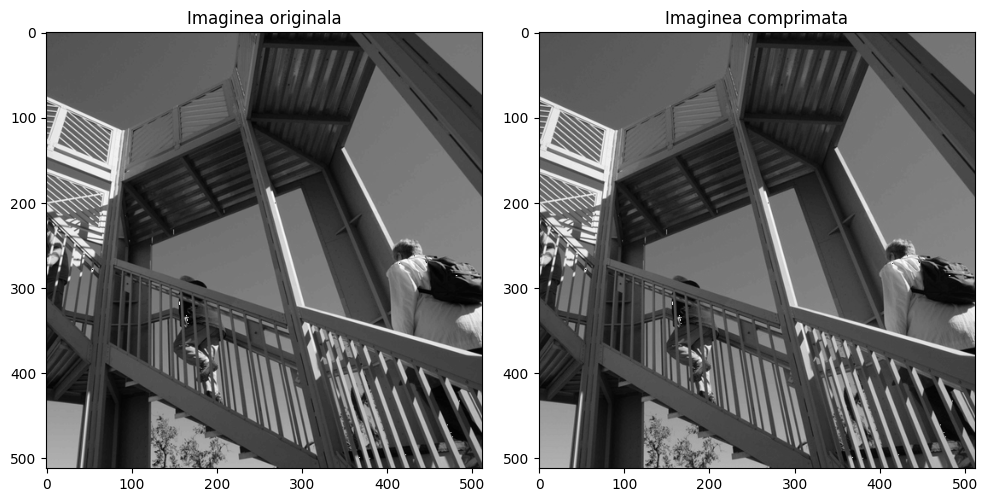

In [100]:
image = datasets.ascent()
rows, cols = image.shape
image_jpeg = np.zeros(image.shape)
block_size = 8

for i in range(0, rows, block_size):
    for j in range(0, cols, block_size):
        # Encoding
        x = image[i: i + block_size, j: j + block_size]
        y = dctn(x)
        y_jpeg = Q_jpeg * np.round(y / Q_jpeg)

        # Decoding
        x_jpeg = idctn(y_jpeg)
        image_jpeg[i: i + block_size, j: j + block_size] = x_jpeg

plot_images([image, image_jpeg], ["Imaginea originala", "Imaginea comprimata"], "gray")

### Task 2
[4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

In [101]:
def jpeg_algorithm(X, Q_jpeg=Q_jpeg):
    block_size = 8

    X_ycbcr = rgb2ycbcr(X)
    X_jpeg = np.zeros_like(X_ycbcr)

    for channel in range(3):
        rows, cols = X_ycbcr[:, :, channel].shape
        for i in range(0, rows, block_size):
            for j in range(0, cols, block_size):
                # Encoding
                x = X_ycbcr[i: i + block_size, j: j + block_size, channel]
                y = dctn(x)
                y_jpeg = Q_jpeg * np.round(y / Q_jpeg)

                # Decoding
                x_jpeg = idctn(y_jpeg)
                X_jpeg[i: i + block_size, j: j + block_size, channel] = x_jpeg

    return ycbcr2rgb(X_jpeg)

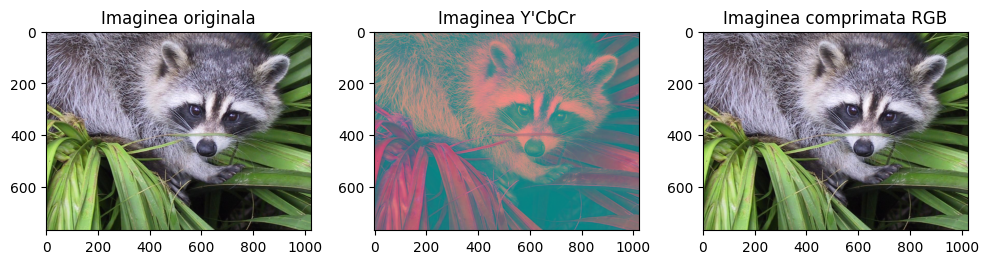

In [102]:
image_rgb = datasets.face()
image_ycbcr = rgb2ycbcr(image_rgb)
image_ycbcr = (image_ycbcr - image_ycbcr.min()) / (image_ycbcr.max() - image_ycbcr.min())

plot_images(
    [image_rgb, np.clip(image_ycbcr, 0, 1), np.clip(jpeg_algorithm(image_rgb), 0, 1)],
    ["Imaginea originala", "Imaginea Y\'CbCr", "Imaginea comprimata RGB"]
)

### Task 3
[6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

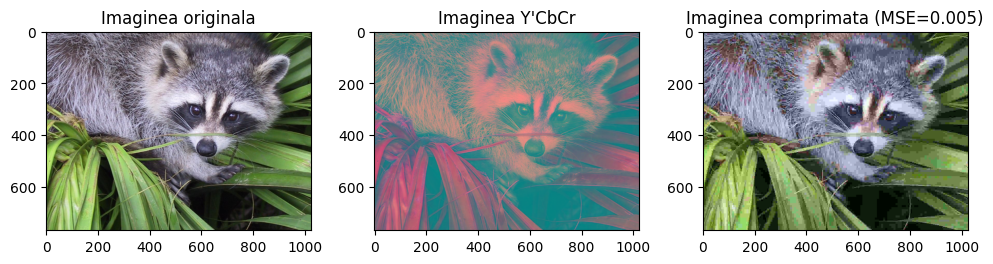

In [112]:
image_rgb = datasets.face()
image_ycbcr = rgb2ycbcr(image_rgb)
image_ycbcr = (image_ycbcr - image_ycbcr.min()) / (image_ycbcr.max() - image_ycbcr.min())

mse_threshold = 0.005
current_mse = 0
factor = 1.0
compressed_image = np.copy(image_rgb)
while current_mse < mse_threshold:
    Q_jpeg_modified = Q_jpeg * factor
    compressed_image = jpeg_algorithm(image_rgb, Q_jpeg_modified)
    current_mse = mean_squared_error(img_as_float(image_rgb), compressed_image)
    factor += 20

plot_images(
    [image_rgb, np.clip(image_ycbcr, 0, 1), np.clip(compressed_image, 0, 1)],
    ["Imaginea originala", "Imaginea Y\'CbCr", f"Imaginea comprimata (MSE={mse_threshold})"]
)

### Task 4
[4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

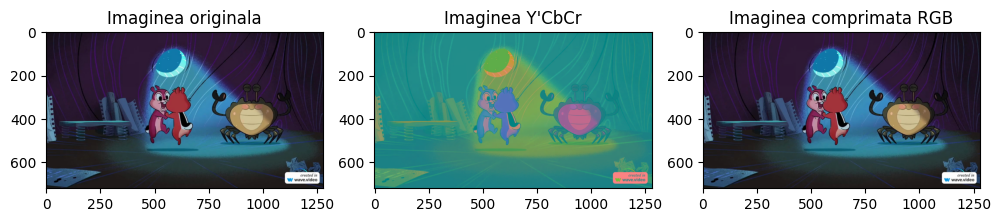

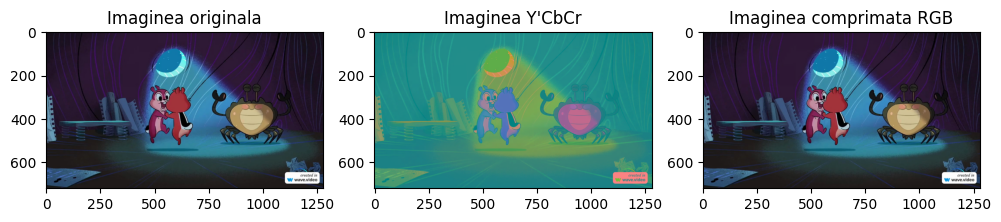

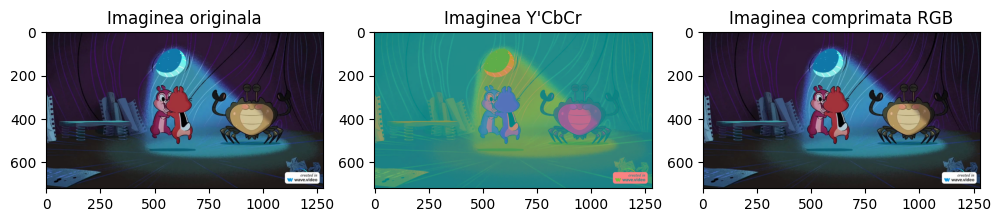

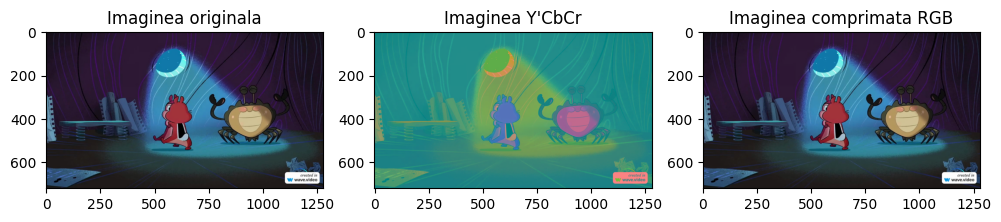

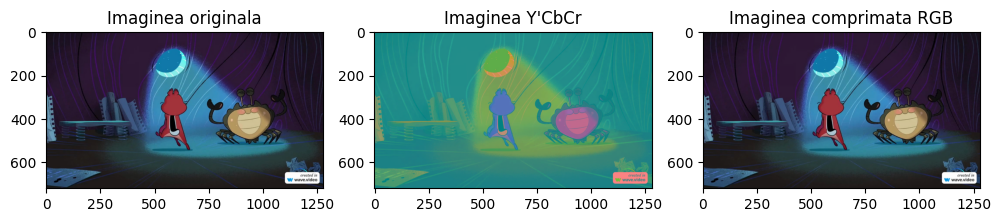

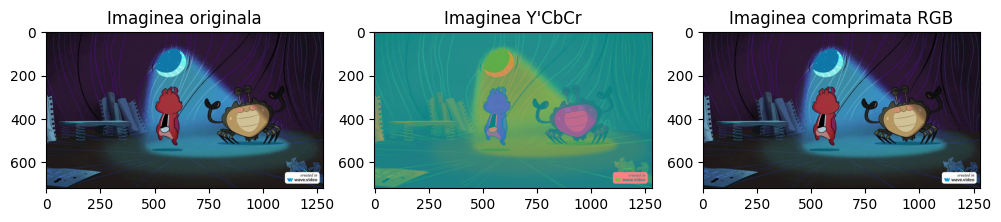

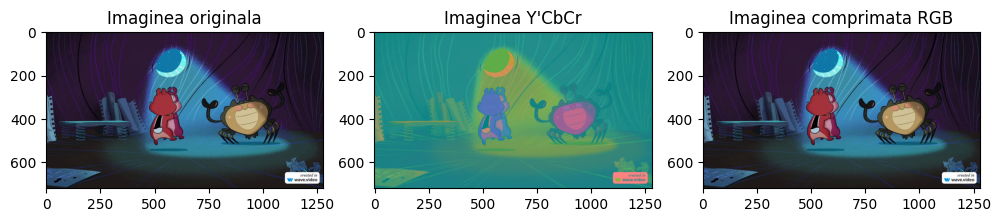

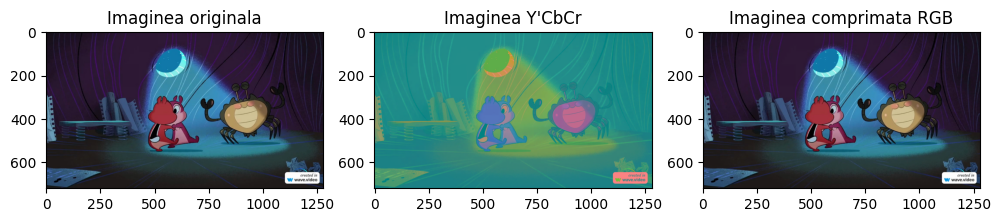

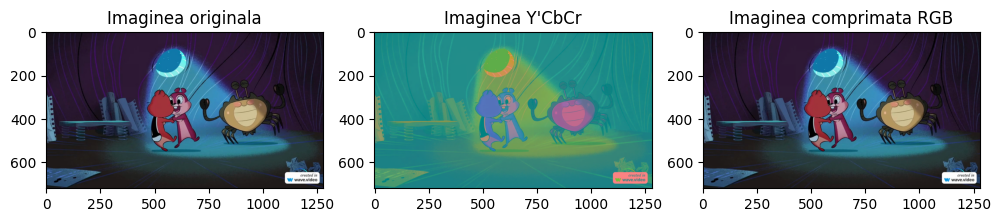

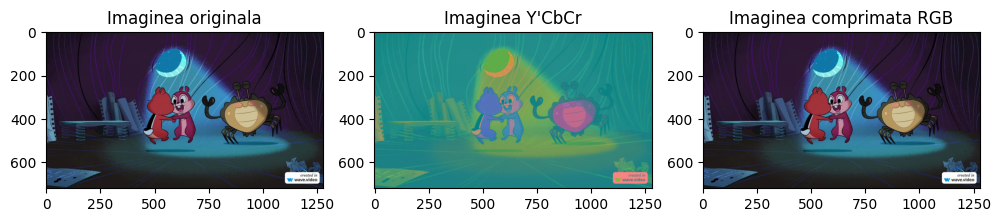

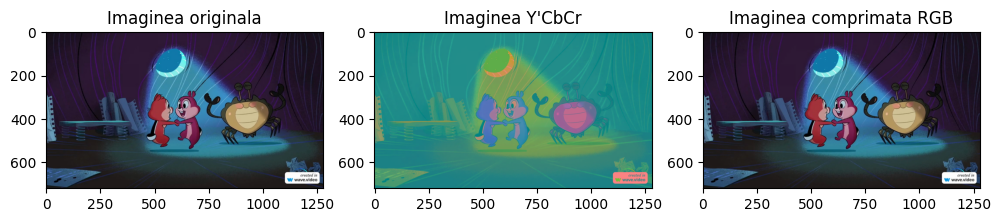

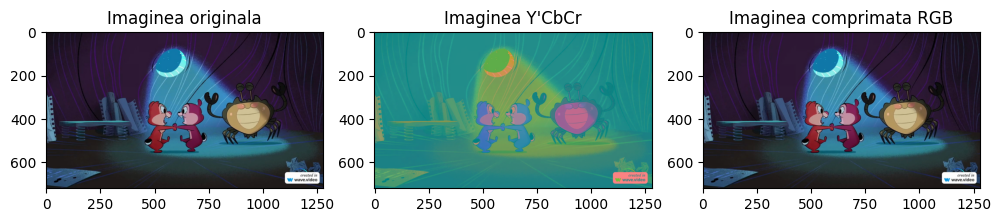

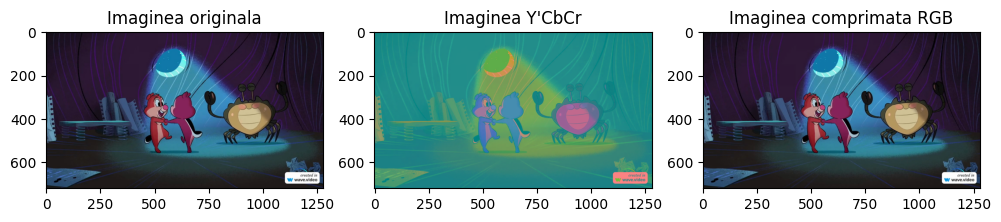

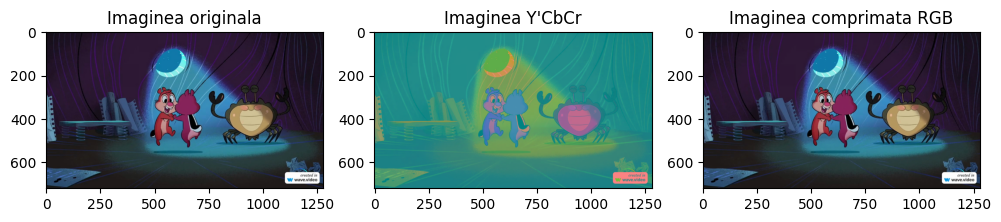

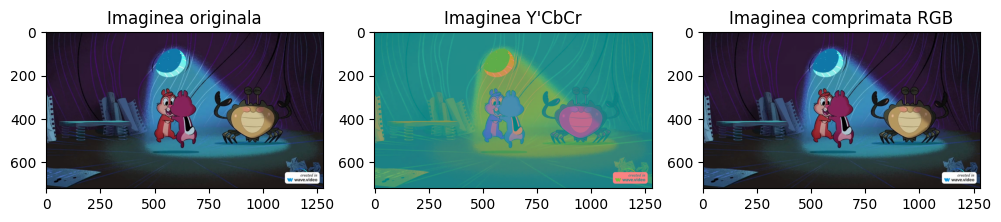

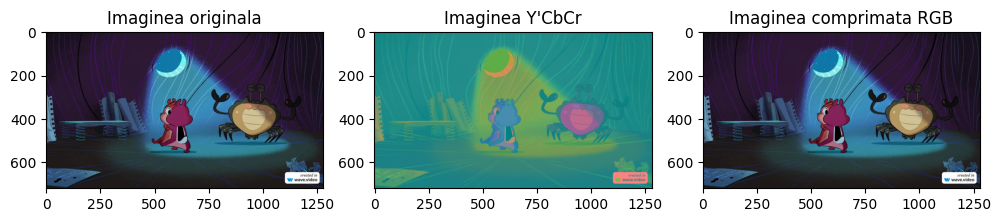

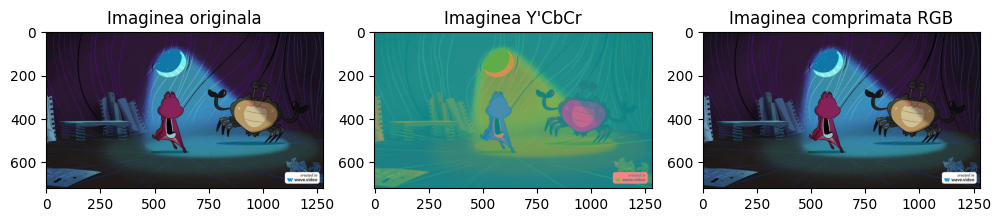

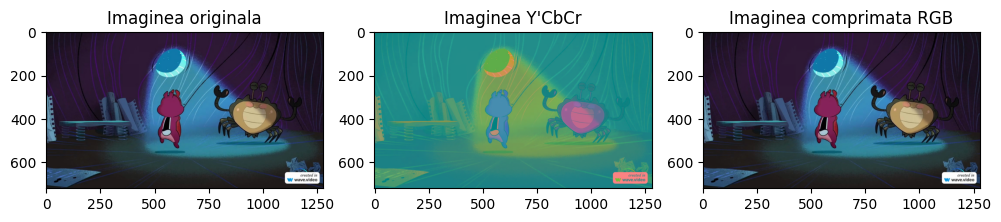

In [113]:
reader = imageio.get_reader("video.mp4")

for index, frame_rgb in enumerate(reader):
    frame_ycbcr = rgb2ycbcr(frame_rgb)
    frame_ycbcr = (frame_ycbcr - frame_ycbcr.min()) / (frame_ycbcr.max() - frame_ycbcr.min())

    if index % 2 == 0:  # Skip frames
        plot_images(
            [frame_rgb, np.clip(frame_ycbcr, 0, 1), np.clip(jpeg_algorithm(frame_rgb), 0, 1)],
            ["Imaginea originala", "Imaginea Y\'CbCr", "Imaginea comprimata RGB"]
        )

reader.close()